# Task : Autoencoding then denoiezing





In [ ]:
import numpy as np
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense  # Remove the unnecessary 'layers' import
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
from scipy import ndimage


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [ ]:
encoding_dim = 64

# Define the input layer
input_layer = Input(shape=(784,))

# Build the encoder
encoder = Dense(256, activation='relu')(input_layer)
encoder = Dense(128, activation='relu')(encoder)
encoder = Dense(encoding_dim, activation='relu')(encoder)

# Build the decoder
decoder = Dense(64, activation='relu')(encoder)
decoder = Dense(128, activation='relu')(decoder)
output_layer = Dense(784, activation='sigmoid')(decoder)

# Combine encoder and decoder into an autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output_layer)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
trained=autoencoder.fit(X_train, X_train, epochs=20, batch_size=32, validation_data=(X_test, X_test))

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1386 - val_loss: 0.1037
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0985 - val_loss: 0.0924
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0913 - val_loss: 0.0894
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0873 - val_loss: 0.0850
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0848 - val_loss: 0.0830
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0831 - val_loss: 0.0814
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0817 - val_loss: 0.0802
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0805 - val_loss: 0.0791
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0796 - val_loss: 0.0784
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.078

313/313 [==============================] - 1s 2ms/step


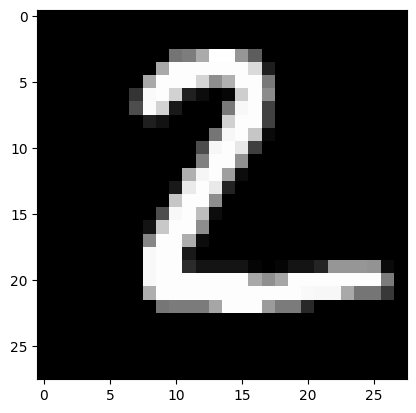

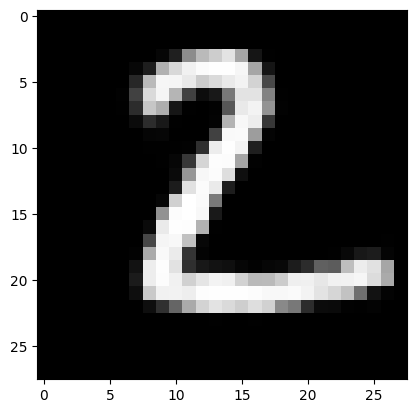

In [ ]:
X_test_pred = autoencoder.predict(X_test)
X_test_pred[1]
plt.imshow(X_test[1].reshape(28, 28), cmap='gray')
plt.show()
plt.imshow(X_test_pred[1].reshape(28, 28), cmap='gray')
plt.show()

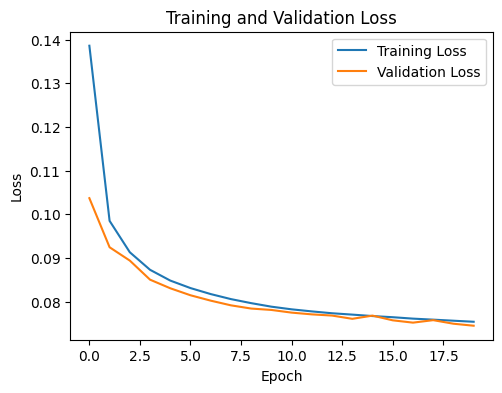

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(trained.history['loss'], label='Training Loss')
plt.plot(trained.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

313/313 [==============================] - 1s 2ms/step


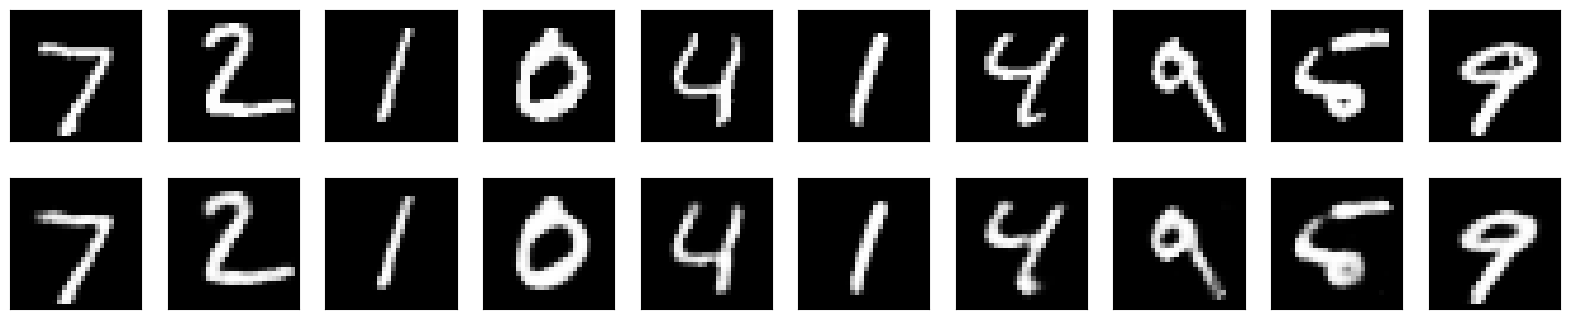

In [ ]:
# Encode and decode some test images
encoded_imgs = autoencoder.predict(X_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

# Display original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(X_test_pred[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Choose a random image
random_index = np.random.randint(0, X_test.shape[0])

# Add random noise to the selected image
noise_factor = 0.3
noisy_image = X_test[random_index] + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test[random_index].shape)
noisy_image = np.clip(noisy_image, 0., 1.)
# Denoise the noisy image using the autoencoder
noisy_image_flattened = noisy_image.reshape(1, 784) # Flatten the noisy image
denoised_image = autoencoder.predict(noisy_image_flattened)
denoised_image = denoised_image.reshape(1, 28, 28, 1)


1/1 [==============================] - 0s 26ms/step


In [ ]:
# Reshape images for display
original_image = X_test[random_index].reshape(28, 28)
noisy_image_display = noisy_image.reshape(28, 28)
denoised_image_display = denoised_image.reshape(28, 28)

# Display the images
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

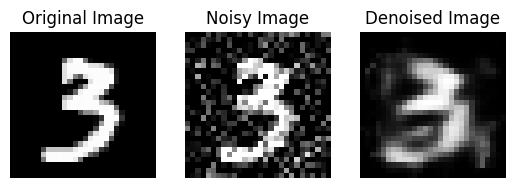

In [ ]:
# Original image
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
# Noisy image
plt.subplot(1, 3, 2)
plt.imshow(noisy_image_display, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')
# Denoised image
plt.subplot(1, 3, 3)
plt.imshow(denoised_image_display, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')

plt.show()